In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [175]:
df = pd.read_csv("wifi_localization.txt",sep="\t", header=None)
df = abs(df)
data = df[[0,1,2,3,4,5,6]]
df

,0,1,2,3,4,5,6,7
0,64,56,61,66,71,82,81,1
1,68,57,61,65,71,85,85,1
2,63,60,60,67,76,85,84,1
3,61,60,68,62,77,90,80,1
4,63,65,60,63,77,81,87,1
...,...,...,...,...,...,...,...,...
1995,59,59,48,66,50,86,94,4
1996,59,56,50,62,47,87,90,4
1997,62,59,46,65,45,87,88,4
1998,62,58,52,61,41,90,85,4


In [176]:
df.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.330500,55.623500,54.964000,53.566500,62.640500,80.985000,81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,10.000000,45.000000,40.000000,11.000000,36.000000,61.000000,63.000000,1.000000
25%,46.000000,53.000000,51.000000,46.000000,56.000000,77.000000,78.000000,1.750000
50%,55.000000,56.000000,55.000000,56.000000,64.000000,82.000000,83.000000,2.500000
75%,61.000000,58.000000,58.000000,63.000000,69.000000,86.000000,87.000000,3.250000
max,74.000000,74.000000,73.000000,77.000000,89.000000,97.000000,98.000000,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f055d68aa30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f055d683880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f055d690d30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f055d690e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f055d6903d0>,
 'means': []}

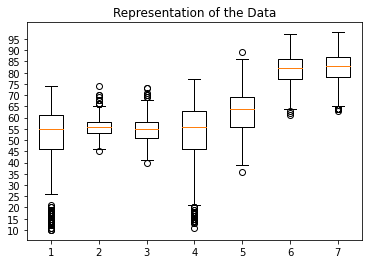

In [177]:
plt.yticks(range(0,100,5))
plt.title("Representation of the Data")
plt.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f055d568ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f055d5760a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f055d5687f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f055d576640>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f055d576910>,
 'means': []}

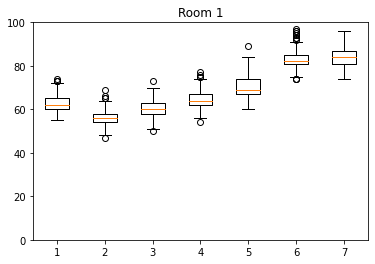

In [178]:
filt_room1 = (df[7]==1)
plt.ylim(0,100)
plt.title("Room 1")
plt.boxplot(data[filt_room1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f055d795be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f055d795580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f055d6a6730>,
 'medians': [<matplotlib.lines.Line2D at 0x7f055d7c7910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f055d7c7460>,
 'means': []}

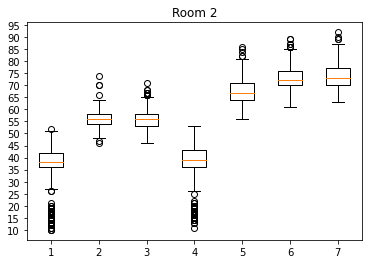

In [179]:
filt_room2 = (df[7]==2)
plt.yticks(range(0,100,5))
plt.title("Room 2")
plt.boxplot(data[filt_room2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f055d9cd1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f055d9cdf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f055d918910>,
 'medians': [<matplotlib.lines.Line2D at 0x7f055d9cd5b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f055d9cdb50>,
 'means': []}

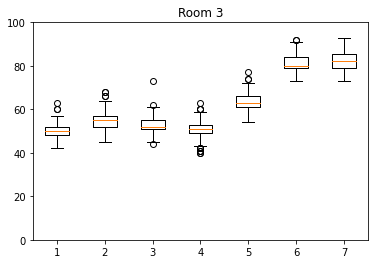

In [180]:
filt_room3 = (df[7]==3)
plt.ylim(0,100)
plt.title("Room 3")
plt.boxplot(data[filt_room3])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f055dfa0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f055dfa02b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f055df1d1c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f055dfa0400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f055ddc3ca0>,
 'means': []}

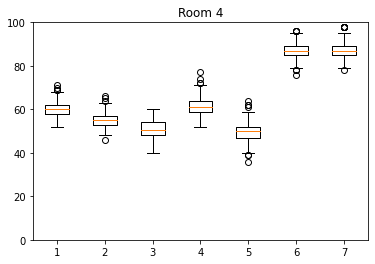

In [181]:
filt_room4 = (df[7]==4)
plt.ylim(0,100)
plt.title("Room 4")
plt.boxplot(data[filt_room4])

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


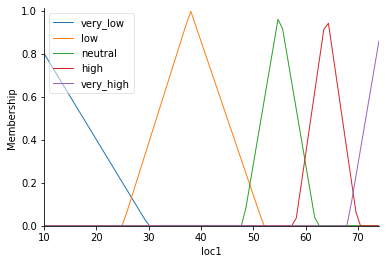

In [182]:
# Location 1

X = np.linspace(start=data[0].min(), stop=data[0].max(), num=data[0].max(), endpoint=True, retstep=False)
loc1 = ctrl.Antecedent(X, 'loc1')

interval1 = [5, 5, 30]
interval2 = [25, int(((52-25)/2) + 25), 52]
interval3 = [48, int(((62-48)/2) + 48), 62]
interval4 = [58, int(((70-58)/2) + 58), 70]
interval5 = [68, 75, 75]

loc1['very_low'] = fuzz.membership.trimf(X, interval1)
loc1['low'] = fuzz.membership.trimf(X, interval2)
loc1['neutral'] = fuzz.membership.trimf(X, interval3)
loc1['high'] = fuzz.membership.trimf(X, interval4)
loc1['very_high'] = fuzz.membership.trimf(X, interval5)
loc1.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


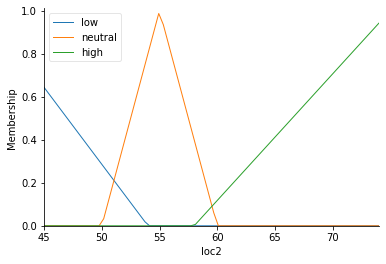

In [183]:
# Location 2

X = np.linspace(start=data[1].min(), stop=data[1].max(), num=data[1].max(), endpoint=True, retstep=False)
loc2 = ctrl.Antecedent(X, 'loc2')

interval1 = [40, 40, 54]
interval2 = [50, int(((60-50)/2) + 50), 60]
interval3 = [58, 75, 75]

loc2['low'] = fuzz.membership.trimf(X, interval1)
loc2['neutral'] = fuzz.membership.trimf(X, interval2)
loc2['high'] = fuzz.membership.trimf(X, interval3)
loc2.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


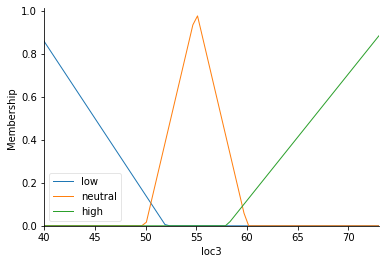

In [184]:
# Location 3
X = np.linspace(start=data[2].min(), stop=data[2].max(), num=data[2].max(), endpoint=True, retstep=False)
loc3 = ctrl.Antecedent(X, 'loc3')

interval1 = [38, 38, 52]
interval2 = [50, int(((60-50)/2) + 50), 60]
interval3 = [58, 75, 75]

loc3['low'] = fuzz.membership.trimf(X, interval1)
loc3['neutral'] = fuzz.membership.trimf(X, interval2)
loc3['high'] = fuzz.membership.trimf(X, interval3)
loc3.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


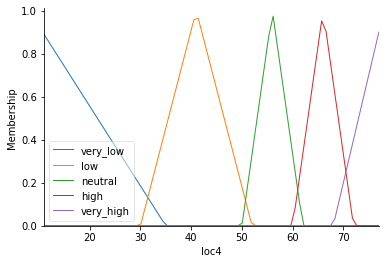

In [185]:
# Location 4

X = np.linspace(start=data[3].min(), stop=data[3].max(), num=data[3].max(), endpoint=True, retstep=False)
loc4 = ctrl.Antecedent(X, 'loc4')

interval1 = [8, 8, 35]
interval2 = [30, int(((52-30)/2) + 30), 52]
interval3 = [50, int(((62-50)/2) + 50), 62]
interval4 = [60, int(((72-60)/2) + 60), 72]
interval5 = [68, 78, 78]

loc4['very_low'] = fuzz.membership.trimf(X, interval1)
loc4['low'] = fuzz.membership.trimf(X, interval2)
loc4['neutral'] = fuzz.membership.trimf(X, interval3)
loc4['high'] = fuzz.membership.trimf(X, interval4)
loc4['very_high'] = fuzz.membership.trimf(X, interval5)
loc4.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


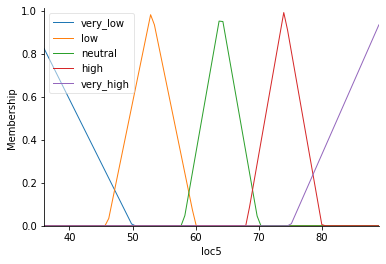

In [186]:
# Location 5

X = np.linspace(start=data[4].min(), stop=data[4].max(), num=data[4].max(), endpoint=True, retstep=False)
loc5 = ctrl.Antecedent(X, 'loc5')

interval1 = [33, 33, 50]
interval2 = [46, int(((60-46)/2) + 46), 60]
interval3 = [58, int(((70-58)/2) + 58), 70]
interval4 = [68, int(((80-68)/2) + 68), 80]
interval5 = [75, 90, 90]

loc5['very_low'] = fuzz.membership.trimf(X, interval1)
loc5['low'] = fuzz.membership.trimf(X, interval2)
loc5['neutral'] = fuzz.membership.trimf(X, interval3)
loc5['high'] = fuzz.membership.trimf(X, interval4)
loc5['very_high'] = fuzz.membership.trimf(X, interval5)
loc5.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


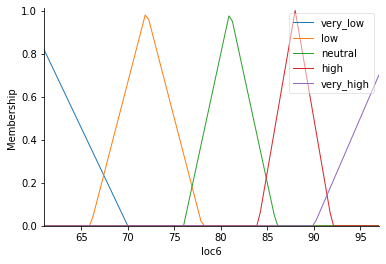

In [187]:
# Location 6

X = np.linspace(start=data[5].min(), stop=data[5].max(), num=data[5].max(), endpoint=True, retstep=False)
loc6 = ctrl.Antecedent(X,'loc6')

interval1 = [59, 59, 70]
interval2 = [66, int(((78-66)/2) + 66), 78]
interval3 = [76, int(((86-76)/2) + 76), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 100, 100]

loc6['very_low'] = fuzz.membership.trimf(X, interval1)
loc6['low'] = fuzz.membership.trimf(X, interval2)
loc6['neutral'] = fuzz.membership.trimf(X, interval3)
loc6['high'] = fuzz.membership.trimf(X, interval4)
loc6['very_high'] = fuzz.membership.trimf(X, interval5)
loc6.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


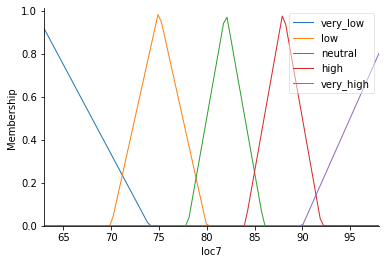

In [188]:
# Location 7

X = np.linspace(start=data[6].min(), stop=data[6].max(), num=data[6].max(), endpoint=True, retstep=False)
loc7 = ctrl.Antecedent(X, 'loc7')

interval1 = [62, 62, 74]
interval2 = [70, int(((80-70)/2) + 70), 80]
interval3 = [78, int(((86-78)/2) + 78), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 100, 100]

loc7['very_low'] = fuzz.membership.trimf(X, interval1)
loc7['low'] = fuzz.membership.trimf(X, interval2)
loc7['neutral'] = fuzz.membership.trimf(X, interval3)
loc7['high'] = fuzz.membership.trimf(X, interval4)
loc7['very_high'] = fuzz.membership.trimf(X, interval5)
loc7.view()

In [199]:
room4 = ctrl.Consequent(np.arange(1, 100, 1), 'room4')
room4.automf(2, names=['low','high'])

In [205]:
## RULES
#rule1 = ctrl.Rule(loc1['high'] & loc4['high'] & ~(loc5['low'] | loc5['very_low']) & ~(loc6['low'] | loc6['very_low']) & ~(loc7['low'] | loc7['very_low']), room1['high'])
#rule2 = ctrl.Rule((loc1['low'] | loc1['very_low']) & ~(loc4['high'] | loc4['very_high']) & ~(loc5['low'] | loc5['very_low']), room['2'])
#rule3 = ctrl.Rule((loc1['neutral'] | loc1['low']) & (loc4['neutral'] | loc4['high']) & loc5['neutral'] & ~(loc6['very_low']) & ~(loc7['very_low']), room['3'])
rule4 = ctrl.Rule((loc1['neutral'] | loc1['high']) & ~(loc3['high']) & ~(loc4['low'] | loc4['very_low']) & (loc5['low'] | loc5['very_low']) & ~(loc6['low'] | loc6['very_low']) & ~(loc7['low'] | loc7['very_low']), room4['high'])
problem_ctrl  = ctrl.ControlSystem([rule4])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

In [203]:
df.iloc[1700][7]

4

In [206]:
## APPLICATION
problem.input['loc1'] = df.iloc[1700][0]
problem.input['loc3'] = df.iloc[1700][2]
problem.input['loc4'] = df.iloc[1700][3]
problem.input['loc5'] = df.iloc[1700][4]
problem.input['loc6'] = df.iloc[1700][5]
problem.input['loc7'] = df.iloc[1700][6]

problem.compute()

print(problem.output['room4'])
room4.view(sim=problem)

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.